In [1]:
# Imports
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(os.path.abspath('../src'))
sys.path.append(os.path.abspath('../utils'))
from preprocessing import load_data, summarize_missing_values, fill_missing_values

from visualization import (
    plot_histogram, plot_boxplot, plot_bar, plot_time_series, plot_heatmap,plot_outlier_boxplots,count_outliers
)


📌 Data Understanding:

In [2]:
# Load data
df = load_data("../data/insurance_data.csv")

/home/pemo/Documents/10x/Insurance Risk Analytics & Predictive Modeling/src/preprocessing.py:5: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(filepath)


In [3]:

# Find the number of rows and columns
print(df.shape)
df.info()

(1000098, 52)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province     

In [4]:
df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


📌 Data Quality Check:

In [5]:
df, dropped_cols = summarize_missing_values(df, threshold=0.5)

📊 Missing Value Summary:
Bank                        145961
AccountType                  40232
MaritalStatus                 8259
Gender                        9536
mmcode                         552
VehicleType                    552
make                           552
Model                          552
Cylinders                      552
cubiccapacity                  552
kilowatts                      552
bodytype                       552
NumberOfDoors                  552
VehicleIntroDate               552
CustomValueEstimate         779642
CapitalOutstanding               2
NewVehicle                  153295
WrittenOff                  641901
Rebuilt                     641901
Converted                   641901
CrossBorder                 999400
NumberOfVehiclesInFleet    1000098
dtype: int64

🧹 Dropped 6 columns with > 50% missing values:
['CustomValueEstimate', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet']


In [6]:
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])

In [7]:
df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [8]:
df = fill_missing_values(df)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 46 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   UnderwrittenCoverID       1000098 non-null  int64         
 1   PolicyID                  1000098 non-null  int64         
 2   TransactionMonth          1000098 non-null  datetime64[ns]
 3   IsVATRegistered           1000098 non-null  bool          
 4   Citizenship               1000098 non-null  object        
 5   LegalType                 1000098 non-null  object        
 6   Title                     1000098 non-null  object        
 7   Language                  1000098 non-null  object        
 8   Bank                      1000098 non-null  object        
 9   AccountType               1000098 non-null  object        
 10  MaritalStatus             1000098 non-null  object        
 11  Gender                    1000098 non-null  object

In [10]:
numeric_cols = ['TotalPremium','TotalClaims','SumInsured','CalculatedPremiumPerTerm','UnderwrittenCoverID','PolicyID','PostalCode','NumberOfDoors','kilowatts','cubiccapacity','Cylinders','RegistrationYear']
# Watching value counts for the columns
for col in numeric_cols:
    df_valueCount = pd.DataFrame({
    'count':df[col].value_counts().values
    }, index=df[col].value_counts().keys())
    df_valueCount.sort_index(inplace=True)
    display(df_valueCount.T)

TotalPremium,-782.576754,-575.579649,-350.701491,-302.932937,-294.786842,-284.497807,-222.805025,-135.755416,-114.111036,-96.491228,...,1890.948684,2253.507281,2552.414813,2728.443421,2770.523421,4211.780866,24473.363772,60143.249924,64291.060263,65282.603421
count,11,11,11,1,11,12,1,1,1,1,...,6,10,1,1,4,1,6,1,1,4


TotalClaims,-12002.412281,-5690.719298,-635.480000,-256.350000,-72.000000,0.000000,139.043860,158.510000,170.657895,175.438596,...,265789.473684,269311.929825,276248.859649,286686.431053,302361.149123,304338.657895,304413.394737,363343.421053,376432.491228,393092.105263
count,1,1,1,1,1,997305,2,1,2,4,...,1,1,1,1,1,1,1,1,1,1


SumInsured,0.01,1000.00,1500.00,3500.00,5000.00,7000.00,7500.00,10000.00,16300.00,17900.00,...,670000.00,675000.00,689608.00,715712.00,1500000.00,4883300.00,5000000.00,10000000.00,12438200.00,12636200.00
count,107597,10,281,102416,102508,64837,262599,655,12,25,...,24,10,6,18,63,10,104042,32,10,9


CalculatedPremiumPerTerm,0.0000,0.0002,0.0004,0.0005,0.0006,0.0007,0.0257,0.0271,0.0273,0.0276,...,2253.0115,2383.4576,2561.8622,2568.9983,3051.8211,3110.4255,3158.3967,27899.6347,73291.8087,74422.1679
count,7,269,227,122,334,124,22,20,20,12,...,12,7,12,10,7,10,9,10,10,9


UnderwrittenCoverID,1,2,3,4,5,6,7,11,12,13,...,301163,301165,301166,301167,301168,301169,301170,301173,301174,301175
count,12,12,12,12,12,12,12,12,12,12,...,2,2,2,2,2,2,2,2,2,2


PolicyID,14,15,16,17,18,19,20,21,22,23,...,23219,23220,23222,23223,23238,23239,23241,23244,23245,23246
count,216,225,108,108,108,108,108,216,108,108,...,33,10,1,1,9,8,22,24,22,20


PostalCode,1,2,4,5,6,7,8,17,21,22,...,9745,9750,9752,9756,9762,9781,9830,9868,9869,9870
count,5341,1488,77,400,440,356,1279,160,415,605,...,45,400,120,132,212,643,56,100,1415,220


NumberOfDoors,0.0,2.0,3.0,4.0,5.0,6.0
count,1995,26055,462,893390,76599,1597


kilowatts,0.0,47.0,50.0,51.0,52.0,55.0,58.0,59.0,60.0,61.0,...,173.0,176.0,180.0,182.0,190.0,200.0,224.0,228.0,230.0,309.0
count,328,401,120,216,1,2918,97,2,1754,207,...,1,108,587,99,9,73,698,9,81,182


cubiccapacity,0.0,996.0,1149.0,1197.0,1248.0,1296.0,1297.0,1298.0,1323.0,1329.0,...,4250.0,4300.0,4921.0,5328.0,5675.0,5833.0,5958.0,7961.0,11412.0,12880.0
count,3323,216,99,1,108,2729,90,10185,120,57,...,108,51,81,698,300,80,1,242,216,182


Cylinders,0.0,3.0,4.0,5.0,6.0,8.0,10.0
count,338,216,965836,20947,11982,698,81


RegistrationYear,1987,1988,1992,1994,1995,1996,1997,1998,1999,2000,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
count,3,1,1,52,446,867,1045,1465,1862,1740,...,45111,82514,106008,72168,95579,88765,130884,117064,155889,27589


📌 Descriptive Stats:

In [11]:
df.describe()

,UnderwrittenCoverID,PolicyID,TransactionMonth,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06,1000098,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06
mean,1.048175e+05,7.956682e+03,2015-02-28 10:49:29.147423744,3.020601e+03,5.488056e+07,2.010225e+03,4.046616e+00,2.466869e+03,9.721553e+01,4.019239e+00,6.041727e+05,1.178757e+02,6.190550e+01,6.486119e+01
min,1.000000e+00,1.400000e+01,2013-10-01 00:00:00,1.000000e+00,4.041200e+06,1.987000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-02,0.000000e+00,-7.825768e+02,-1.200241e+04
25%,5.514300e+04,4.500000e+03,2015-01-01 00:00:00,8.270000e+02,6.005692e+07,2.008000e+03,4.000000e+00,2.237000e+03,7.500000e+01,4.000000e+00,5.000000e+03,3.224800e+00,0.000000e+00,0.000000e+00
50%,9.408300e+04,7.071000e+03,2015-04-01 00:00:00,2.000000e+03,6.005842e+07,2.011000e+03,4.000000e+00,2.694000e+03,1.110000e+02,4.000000e+00,7.500000e+03,8.436900e+00,2.178333e+00,0.000000e+00
75%,1.391900e+05,1.107700e+04,2015-06-01 00:00:00,4.180000e+03,6.005842e+07,2.013000e+03,4.000000e+00,2.694000e+03,1.110000e+02,4.000000e+00,2.500000e+05,9.000000e+01,2.192982e+01,0.000000e+00
max,3.011750e+05,2.324600e+04,2015-08-01 00:00:00,9.870000e+03,6.506535e+07,2.015000e+03,1.000000e+01,1.288000e+04,3.090000e+02,6.000000e+00,1.263620e+07,7.442217e+04,6.528260e+04,3.930921e+05
std,6.329371e+04,5.290039e+03,NaN,2.649854e+03,1.360059e+07,3.261391e+00,2.939410e-01,4.427106e+02,1.939061e+01,4.681854e-01,1.508332e+06,3.997017e+02,2.302845e+02,2.384075e+03


📌 Loss Ratio Analysis:

📸 Plot saved to: ../output/loss_ratio_by_province.png


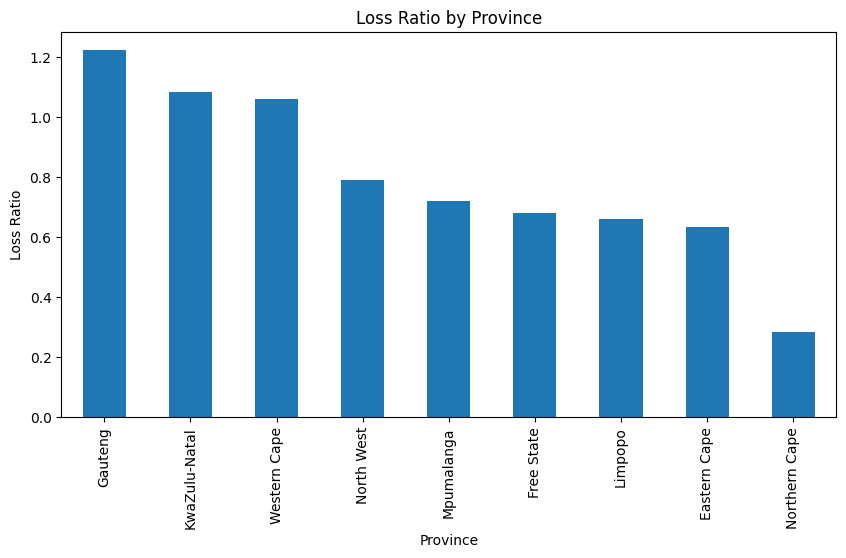

In [12]:
pivot = df.groupby('Province')[['TotalClaims', 'TotalPremium']].sum()
pivot['LossRatio'] = pivot['TotalClaims'] / pivot['TotalPremium']
pivot = pivot.sort_values('LossRatio', ascending=False)
plot_bar(pivot['LossRatio'], 'Loss Ratio by Province', 'Loss Ratio', 'loss_ratio_by_province.png', show=True)

📌 Univariate Analysis:

📸 Plot saved to: ../output/total_premium_hist.png


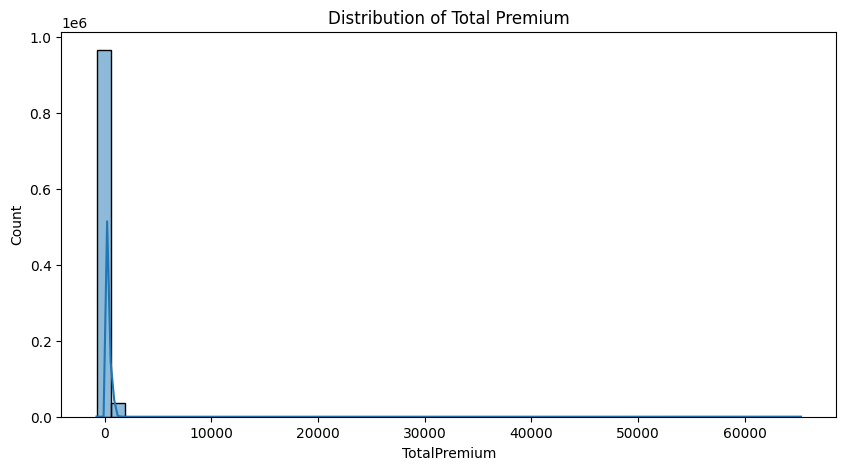

In [13]:
plot_histogram(df['TotalPremium'], "Distribution of Total Premium", "total_premium_hist.png",show=True)

📸 Plot saved to: ../output/total_claims_hist.png


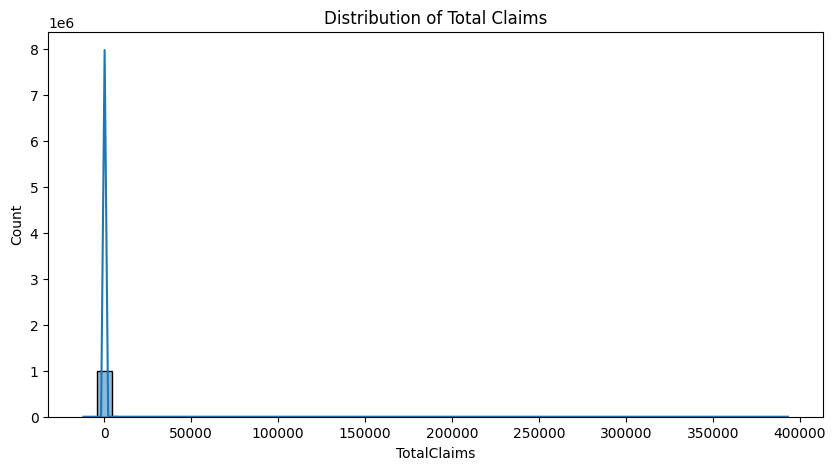

In [14]:
plot_histogram(df['TotalClaims'], "Distribution of Total Claims", "total_claims_hist.png",show=True)


/home/pemo/Documents/10x/Insurance Risk Analytics & Predictive Modeling/utils/visualization.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


📸 Plot saved to: ../output/claims_by_vehicle.png


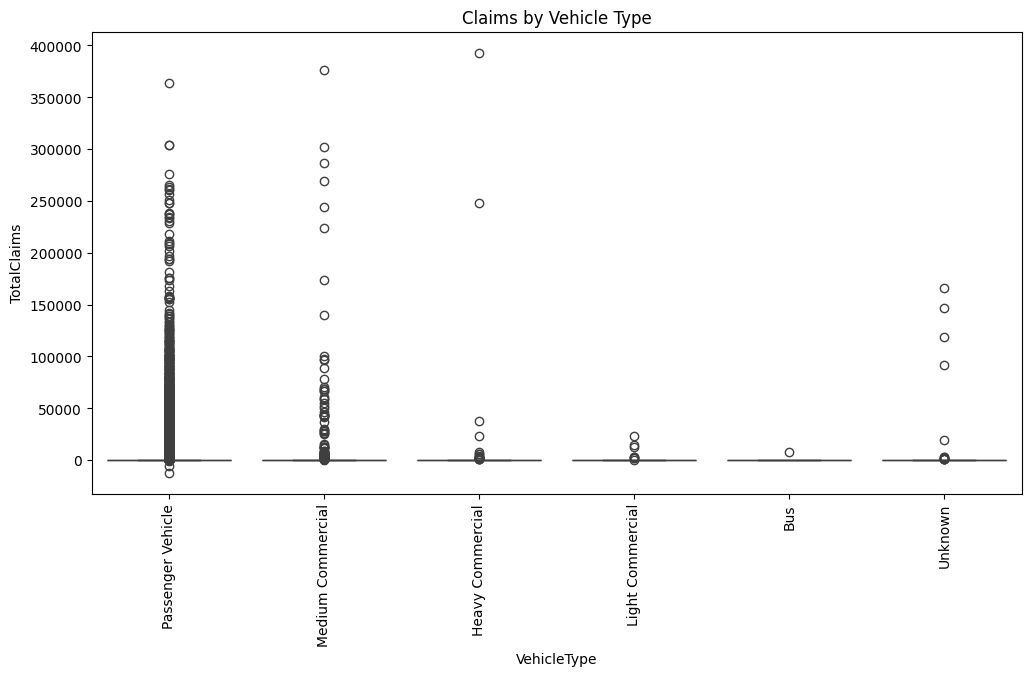

In [15]:
plot_boxplot(df, 'VehicleType', 'TotalClaims', 'Claims by Vehicle Type', 'claims_by_vehicle.png', rotate=True,show=True)

📌 Bivariate/Multivariate Insights

📸 Plot saved to: ../output/loss_ratio_by_province.png


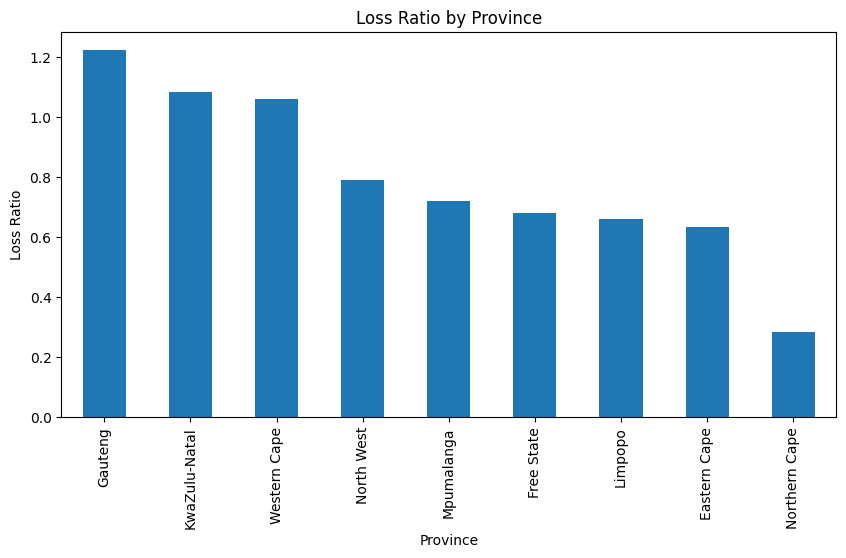

In [16]:
pivot = df.groupby('Province')[['TotalClaims', 'TotalPremium']].sum()
pivot['LossRatio'] = pivot['TotalClaims'] / pivot['TotalPremium']
pivot = pivot.sort_values('LossRatio', ascending=False)
plot_bar(pivot['LossRatio'], 'Loss Ratio by Province', 'Loss Ratio', 'loss_ratio_by_province.png',show=True)

📸 Plot saved to: ../output/monthly_trend.png


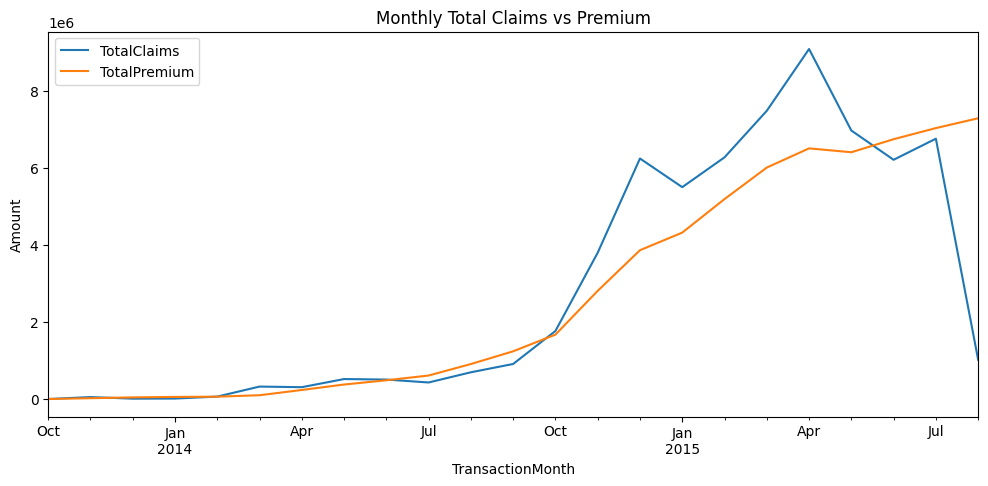

In [17]:
# Temporal Trend
monthly = df.groupby(df['TransactionMonth'].dt.to_period('M'))[['TotalClaims', 'TotalPremium']].sum()
monthly.index = monthly.index.to_timestamp()
plot_time_series(monthly, "Monthly Total Claims vs Premium", "monthly_trend.png",show=True)

📸 Plot saved to: ../output/correlation_matrix.png


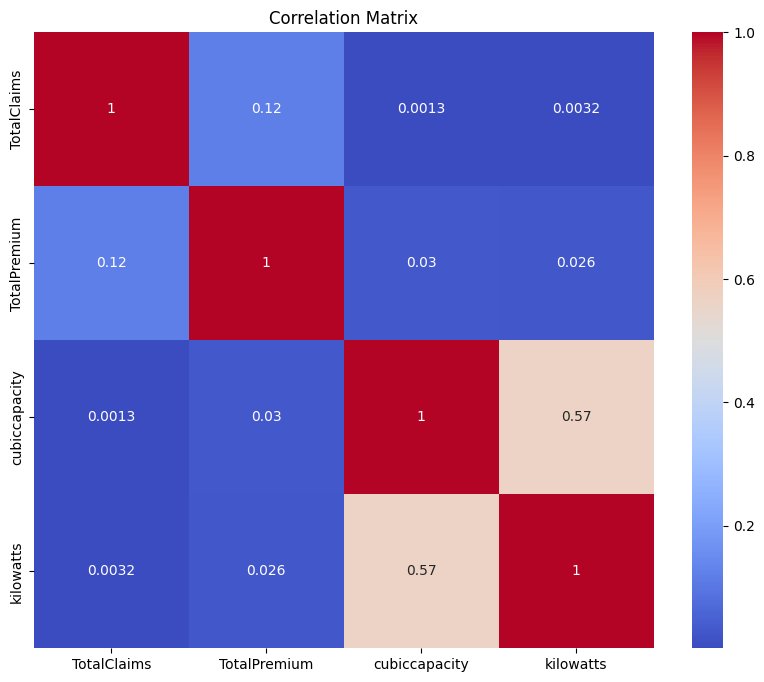

In [18]:
# Correlation Heatmap
corr = df[['TotalClaims', 'TotalPremium','cubiccapacity', 'kilowatts']].corr()
plot_heatmap(corr, "Correlation Matrix", "correlation_matrix.png",show=True)

📌 Creative Plots

📸 Plot saved to: ../output/top_vehicle_makes.png


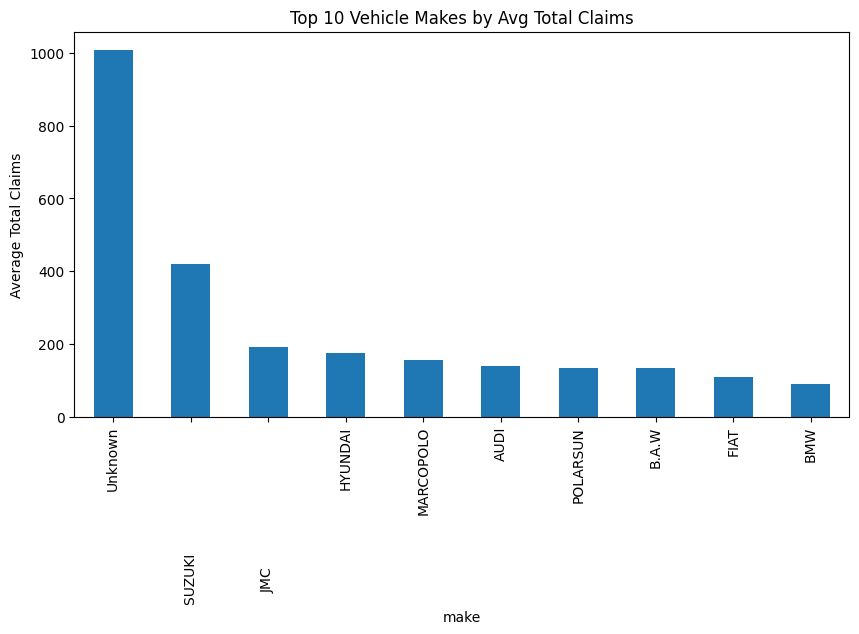

In [19]:
top_makes = df.groupby('make')['TotalClaims'].mean().sort_values(ascending=False).head(10)
plot_bar(top_makes, 'Top 10 Vehicle Makes by Avg Total Claims', 'Average Total Claims', 'top_vehicle_makes.png',show=True)

📸 Plot saved to: ../output/loss_ratio_by_gender.png


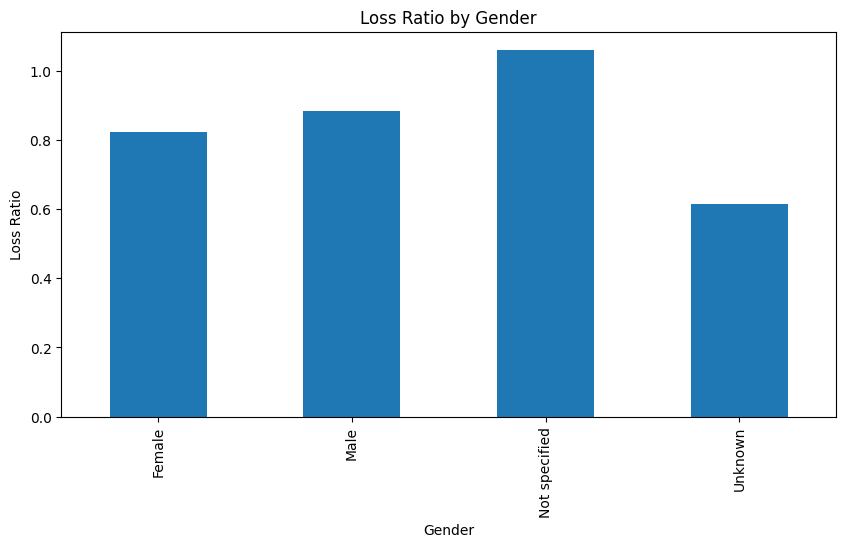

In [20]:
# Gender Loss
gender_loss = df.groupby('Gender')[['TotalClaims', 'TotalPremium']].sum()
gender_loss['LossRatio'] = gender_loss['TotalClaims'] / gender_loss['TotalPremium']
plot_bar(gender_loss['LossRatio'], 'Loss Ratio by Gender', 'Loss Ratio', 'loss_ratio_by_gender.png',show=True)


/home/pemo/Documents/10x/Insurance Risk Analytics & Predictive Modeling/utils/visualization.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


📸 Plot saved to: ../output/claims_by_covertype.png


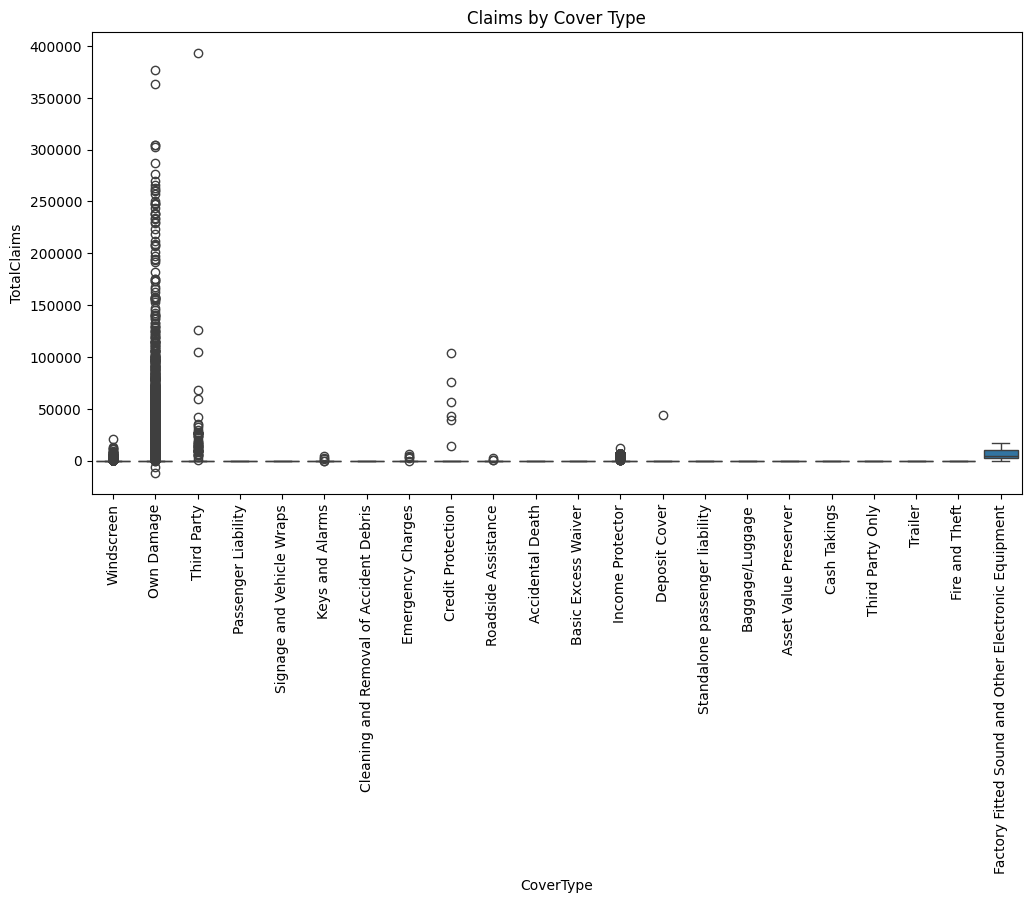

In [21]:
plot_boxplot(df, 'CoverType', 'TotalClaims', 'Claims by Cover Type', 'claims_by_covertype.png', rotate=True,show=True)

📌 Outlier Detection

📸 Plot saved to: ../output/outlier_totalclaims.png


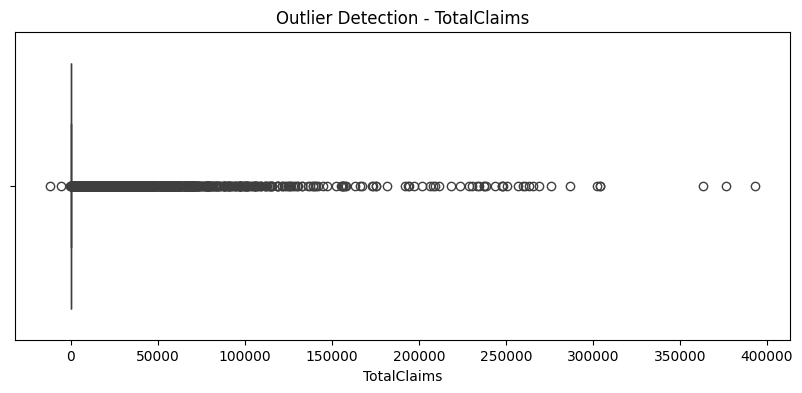

📸 Plot saved to: ../output/outlier_cubiccapacity.png


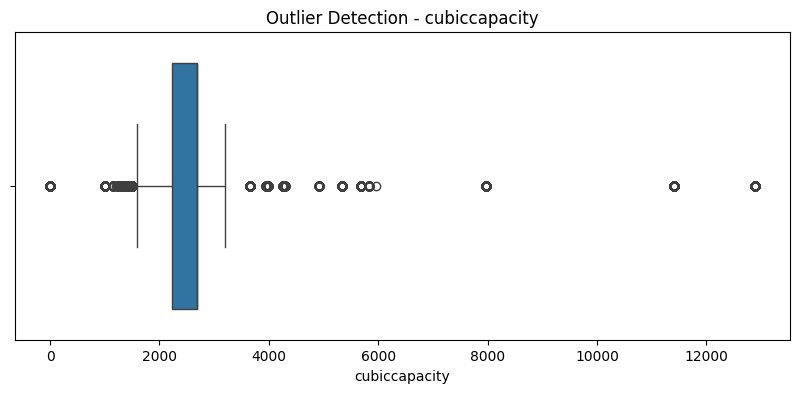

📸 Plot saved to: ../output/outlier_kilowatts.png


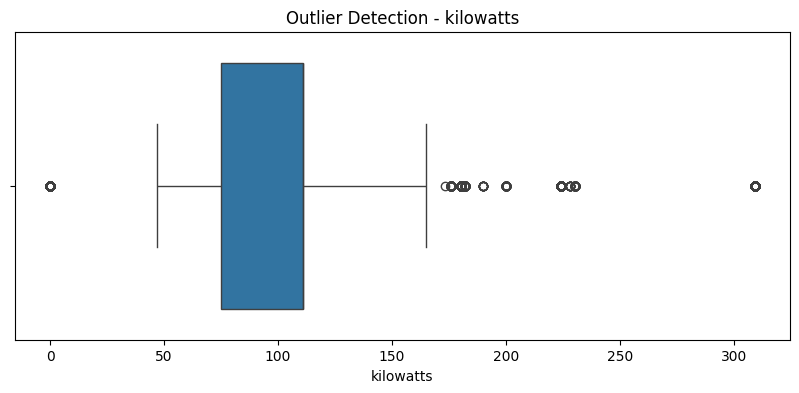

KeyError: 'LossRatio'

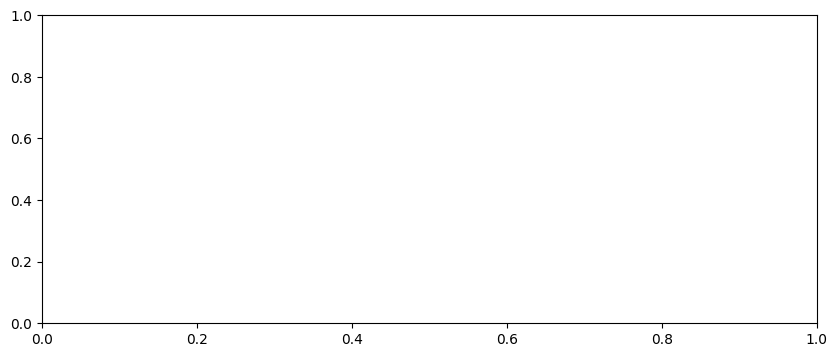

In [ ]:
outlier_cols = ['TotalClaims', 'cubiccapacity', 'kilowatts']
plot_outlier_boxplots(df, outlier_cols, show=True)

In [ ]:
for col in outlier_cols:
    outliers = count_outliers(df[col])
    print(f"{col}: {outliers} outliers")